In [1]:
import scipy
import scipy.signal
from utils import load_file_by_key, MAG_NAMES, MAG_FILT_NAMES, HAND_OPTI, save_data, HEAD_OPTI
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from make_dataset import filter_good_data, extract_controller_coord, package_data, smooth_data
import matplotlib.animation as animation
import numpy as np
from pyquaternion import Quaternion
import pandas as pd
from IPython.display import HTML
%matplotlib notebook

D:\Users\farshid\Dropbox\Ubicomp-projects\mag-fingers\learning\make_dataset.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data[negated_data] = 65536 + data[negated_data]
c:\users\farshid\appdata\local\programs\python\python36-32\lib\site-packages\pandas\core\frame.py:2554: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._where(-key, value, inplace=True)
D:\Users\farshid\Dropbox\Ubicomp-projects\mag-fingers\learning\make_dataset.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org

452
453
626
653
2688
2689
3155
3156
5324
5325
349
350
452
453
2023
2024
3155
3156
3228
3229
5324
5325
349
350
452
453
578
579
2023
2024
8394
8395
10707
10708
452
453
2023
2024
2191
2204
3228
3229
4611
4619
4895
4916
7500
7523
8495
8496
4894
4897
5324
5325
8394
8395
349
350
452
453
578
579
2023
2024
Kept 11544 out of 11725 points. (98%)


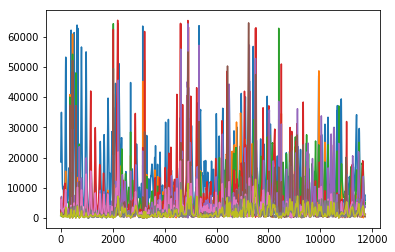

In [2]:
data = load_file_by_key('first_try')
valid_data = filter_good_data(data)
pos, rot = extract_controller_coord(valid_data)
pos_df = pd.Series.to_frame(pos)
pos_df = pos_df.reset_index()
pos_extract = pd.DataFrame(pos_df)
pos_extract[['x','y','z']] = pd.DataFrame(pos_extract[0].values.tolist(), index= pos_extract.index)

In [ ]:
df = pos_extract

def update_graph(num):
    data=df[num:num+100]
    graph._offsets3d = (data.x, data.y, data.z)
    title.set_text('3D Test, time={}'.format(num))


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
title = ax.set_title('3D Test')
ax.set_xlim((-1,1))
ax.set_ylim((-1,1))
ax.set_zlim((-1,1))

data=df[0:0]
graph = ax.scatter(data.x, data.y, data.z)

ani = animation.FuncAnimation(fig, update_graph, 1000, 
                               interval=4, blit=False)

# plt.show()
# ani.save('hand_to_head.html',fps=30)
HTML(ani.to_html5_video())

In [3]:
valid_data

,time,m_0,m_1,m_2,m_3,m_4,m_5,m_6,m_7,m_8,...,head_qy,head_qz,head_qw,hand_x,hand_y,hand_z,hand_qx,hand_qy,hand_qz,hand_qw
5401,1.516750e+09,18546.0,2250.0,718.0,1479.0,3876.0,2551.0,3047.0,1005.0,892.0,...,-0.931810,-0.144400,-0.247316,-0.329926,1.254587,-0.945784,0.880985,0.114079,-0.424769,0.174420
5402,1.516750e+09,19822.0,2559.0,731.0,1593.0,4137.0,2748.0,3275.0,1048.0,945.0,...,-0.931847,-0.144405,-0.247069,-0.328055,1.261369,-0.948592,0.877893,0.113924,-0.428206,0.181565
5403,1.516750e+09,20406.0,2705.0,761.0,1654.0,4260.0,2844.0,3401.0,1047.0,970.0,...,-0.931897,-0.144395,-0.246849,-0.326511,1.267903,-0.951491,0.874168,0.112282,-0.433439,0.188028
5404,1.516750e+09,21125.0,2895.0,775.0,1732.0,4341.0,2926.0,3549.0,1069.0,998.0,...,-0.931918,-0.144446,-0.246584,-0.324872,1.274228,-0.954407,0.871285,0.111140,-0.436179,0.195600
5405,1.516750e+09,21885.0,3137.0,815.0,1795.0,4460.0,3048.0,3679.0,1078.0,1029.0,...,-0.931958,-0.144494,-0.246362,-0.323114,1.280346,-0.957263,0.867840,0.110842,-0.439227,0.204078
5406,1.516750e+09,23336.0,3561.0,873.0,1955.0,4738.0,3264.0,3962.0,1084.0,1091.0,...,-0.931964,-0.144554,-0.246111,-0.320913,1.286872,-0.960923,0.870030,0.109429,-0.437861,0.198370
5407,1.516750e+09,24141.0,3823.0,878.0,2025.0,4825.0,3365.0,4113.0,1122.0,1135.0,...,-0.931779,-0.144082,-0.246687,-0.319440,1.292525,-0.963828,0.867090,0.110085,-0.440315,0.205326
5408,1.516750e+09,24818.0,4026.0,926.0,2090.0,4960.0,3479.0,4266.0,1101.0,1157.0,...,-0.931984,-0.144741,-0.245654,-0.318842,1.297894,-0.966054,0.858126,0.103958,-0.449131,0.226038
5409,1.516750e+09,25612.0,4268.0,951.0,2178.0,5069.0,3582.0,4403.0,1125.0,1187.0,...,-0.931794,-0.144306,-0.246325,-0.316539,1.302937,-0.969493,0.861635,0.111002,-0.444552,0.218258
5410,1.516750e+09,27095.0,4707.0,1015.0,2323.0,5330.0,3807.0,4688.0,1167.0,1260.0,...,-0.931800,-0.144324,-0.246116,-0.316088,1.306947,-0.971313,0.852119,0.112011,-0.452375,0.238127


In [11]:
hand_rel_pos_world = valid_data.apply(lambda x: [x.hand_x - x.head_x, x.hand_y - x.head_y, x.hand_z - x.head_z], axis=1)
head_q_loc_to_world = valid_data.apply(lambda x: Quaternion(a=x.head_qw, b=x.head_qx, c=x.head_qy, d=x.head_qz), axis=1)
hand_q_loc_to_world = valid_data.apply(lambda x: Quaternion(a=x.hand_qw, b=x.hand_qx, c=x.hand_qy, d=x.hand_qz), axis=1)
head_q_world_to_loc = head_q_loc_to_world.apply(lambda x: x.conjugate)

In [12]:
hand_rel_pos_head = pd.concat([hand_rel_pos_world, head_q_world_to_loc], axis=1, keys=['pos', 'q']).apply(lambda x: x.q.rotate(x.pos), axis=1)


In [14]:
hand_rel_pos_head[5401]

[-0.35887241014080673, -0.2056072134417748, -0.2661714156863982]

In [ ]:
head